# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
nb_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
nb_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
nb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8, 1.0, 1.0, 0.9666666666666667]

Accuracy:
0.9533333333333334

Standard Deviation:
0.043969686527576386

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                8            0                0
Iris-setosa                   0           10                0
Iris-versicolor               0            0               12
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor                9            0               0
Iris-setosa                    0            9               0
Iris-virginica                 2            0              10
                 Iris-versicolor  Iris-setosa 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,10,0,0
Iris-setosa,0,9,0
Iris-versicolor,0,0,8


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9333333333333333, 0.8333333333333334, 0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 0.9, 0.9666666666666667, 0.8333333333333334, 0.9666666666666667, 0.8333333333333334, 0.9666666666666667, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.8, 0.9, 1.0, 0.9]

Accuracy:
0.9183333333333333

Standard Deviation:
0.058190300833653626

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                7            0                1
Iris-setosa                   0           10                0
Iris-versicolor               1            0               11
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor                8            0               1
Iris-setosa                    0            9               0
Iris-virginica                 4            0               8
                 Iris-versicolor  Iris-setosa  Iris-virginica

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,1
Iris-setosa,0,9,0
Iris-versicolor,0,0,8


# Showing naive bayes informations computed

In [8]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.9666666666666667, 0.9, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9, 1.0, 0.9333333333333333, 0.9, 0.9333333333333333, 1.0, 0.9333333333333333]

Accuracy:
0.9450000000000001

Standard Deviation:
0.03378855822118882

Confusion Matrix:
                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                7            0                1
Iris-setosa                   0           10                0
Iris-versicolor               0            0               12
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-versicolor                8            0               1
Iris-setosa                    0            9               0
Iris-virginica                 2            0              10
                 Iris-versicolor  Iris-setosa  Iris-virginica
Iris-ve

In [9]:
confusion_matrix_mean(nb_confusion_matrix_list)

,Iris-virginica,Iris-setosa,Iris-versicolor
Iris-virginica,9,0,1
Iris-setosa,0,9,0
Iris-versicolor,0,0,8


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
91            6.1          3.0
134           6.1          2.6
33            5.5          4.2
7             5.0          3.4
32            5.2          4.1
..            ...          ...
8             4.4          2.9
115           6.4          3.2
102           7.1          3.0
141           6.9          3.1
76            6.8          2.8

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
131           7.9          3.8
41            4.5          2.3
28            5.2          3.4
87            6.3          2.3
34            4.9          3.1
127           6.1          3.0
30            4.8          3.1
45            4.8          3.0
60            5.0          2.0
143           6.8          3.2
107           7.3          2.9
116           6.5          3.0
6             4.6          3.4
66            5.6          3.0
58            6.6          2.9
46            5.1          3.8
70            5.9          3.2
90            5.5

# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

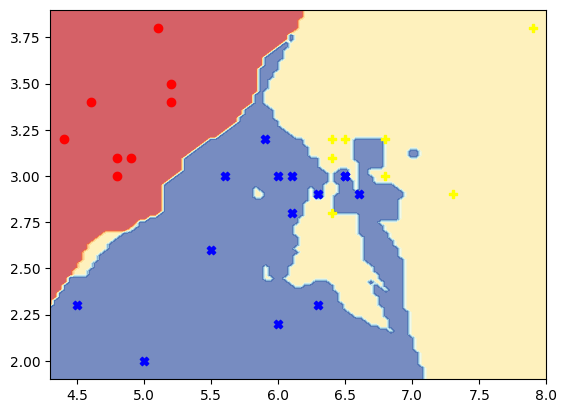

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

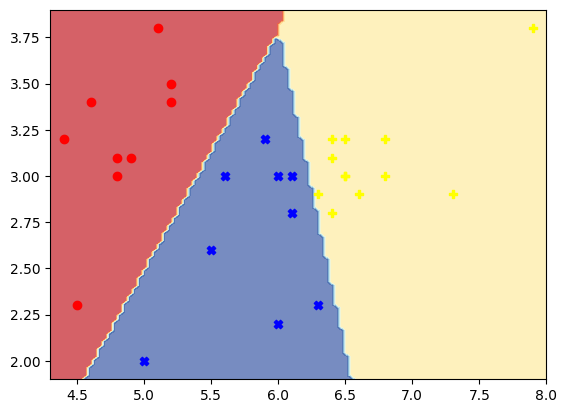

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()

# Plotting naive bayes decision surface

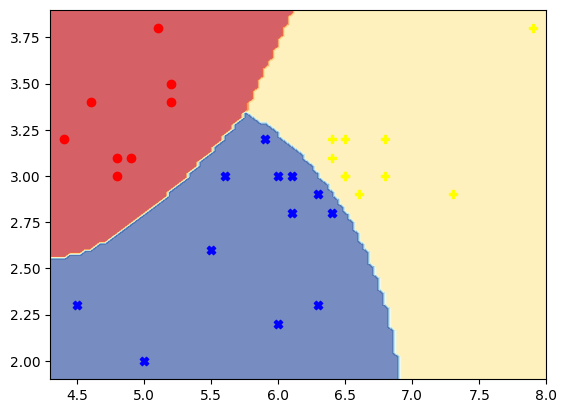

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'Iris-setosa':
        y_pred[0][i] = 1
    elif y == 'Iris-virginica':
        y_pred[0][i] = 2
    elif y == 'Iris-versicolor':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

setosa = np.where(nb_y_pred == 'Iris-setosa')
virginica = np.where(nb_y_pred == 'Iris-virginica')
versicolor = np.where(nb_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='yellow', marker='P', label='virginica')

plt.show()